<a href="https://colab.research.google.com/github/belpa03/webapp/blob/main/app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [ ]:
pip install cmake

In [ ]:
pip install --upgrade pip setuptools

In [ ]:
pip install torch --use-pep517

In [ ]:
!pip install torch

In [ ]:
pip install torch --no-cache-dir

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [ ]:
!python -m venv newenv
!newenv\Scripts\activate  # Untuk Windows
!pip install torch

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/newenv/bin/python3

/bin/bash: line 1: newenvScriptsactivate: command not found


In [ ]:
!python3.11 -m venv newenv

/bin/bash: line 1: python3.11: command not found


In [ ]:
!newenv\Scripts\activate

/bin/bash: line 1: newenvScriptsactivate: command not found


In [ ]:
pip install torch

In [ ]:
!pip install streamlit-option-menu
!pip install streamlit

In [ ]:
import streamlit as st
from streamlit_option_menu import option_menu
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

In [22]:
df=pd.read_csv("user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [24]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


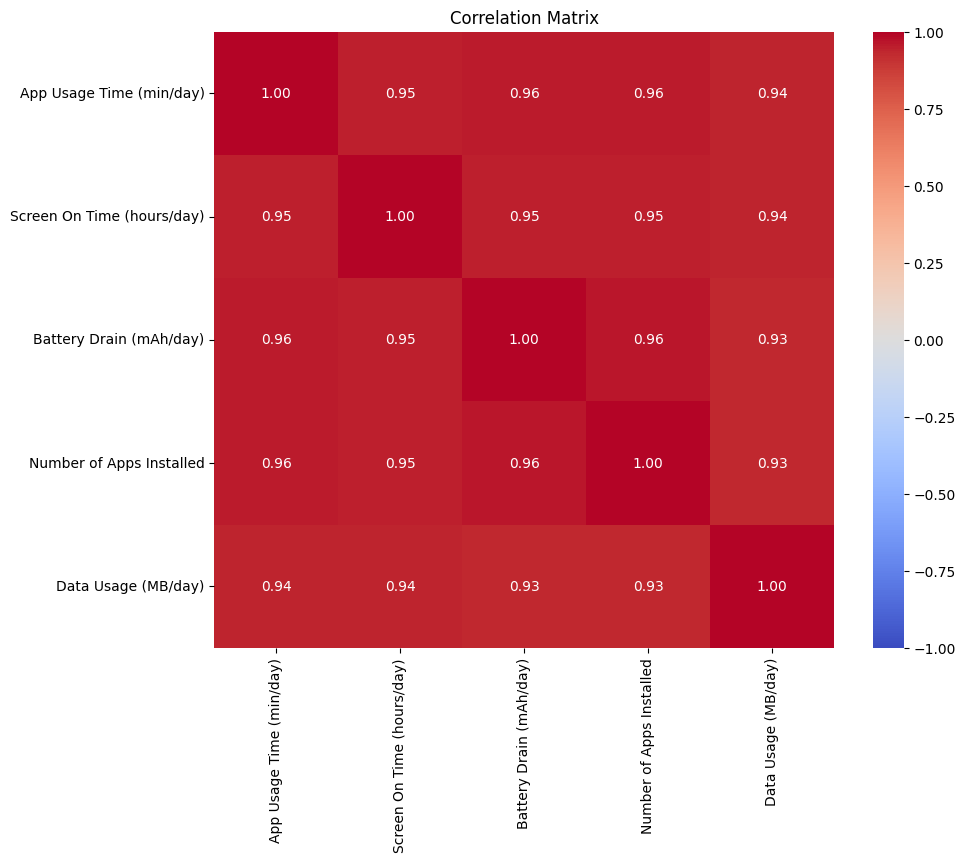

In [25]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(['User ID', 'User Behavior Class', 'Age'], axis=1)

# Buat matriks korelasi
correlation_matrix = numerical_df.corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

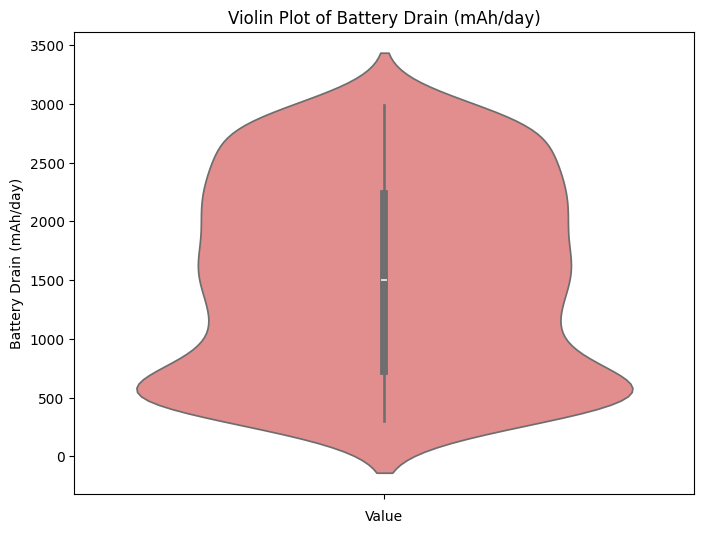

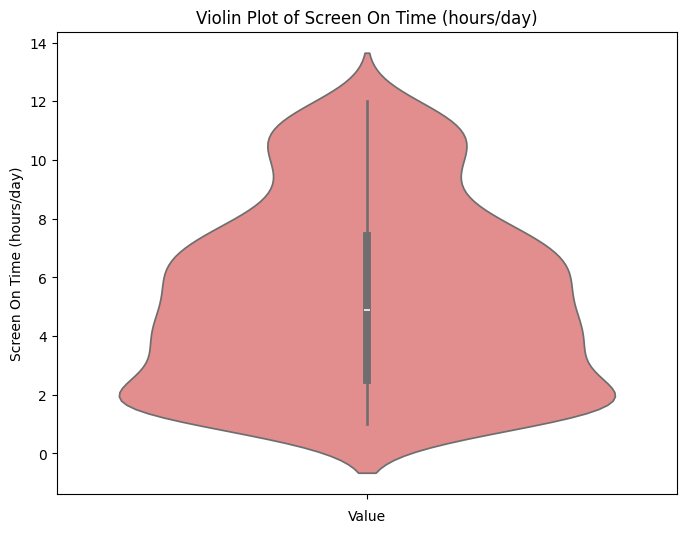

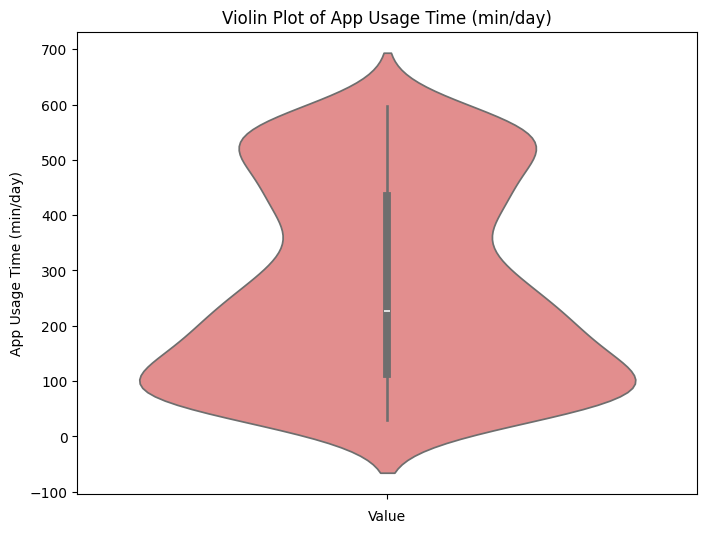

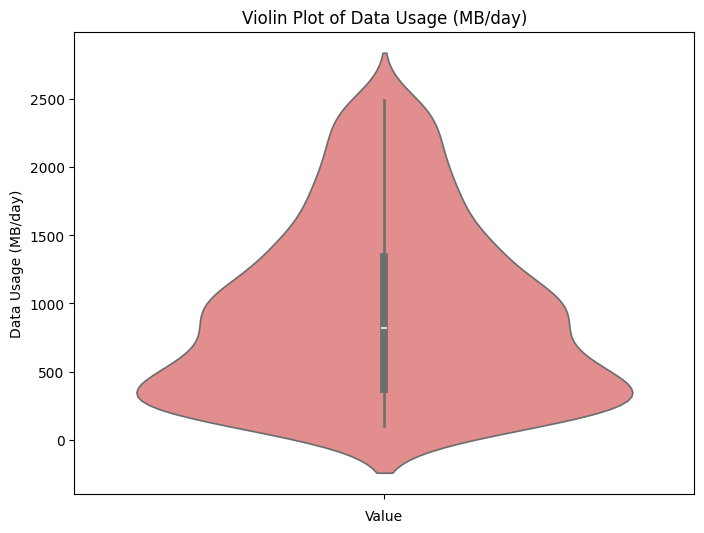

In [26]:
cols_to_plot = ['Battery Drain (mAh/day)', 'Screen On Time (hours/day)', 'App Usage Time (min/day)', 'Data Usage (MB/day)']

for col in cols_to_plot:
    plt.figure(figsize=(8, 6))
    sns.violinplot(y=df[col], color='lightcoral')
    plt.title(f'Violin Plot of {col}')
    plt.xlabel('Value')
    plt.ylabel(col)
    plt.show()

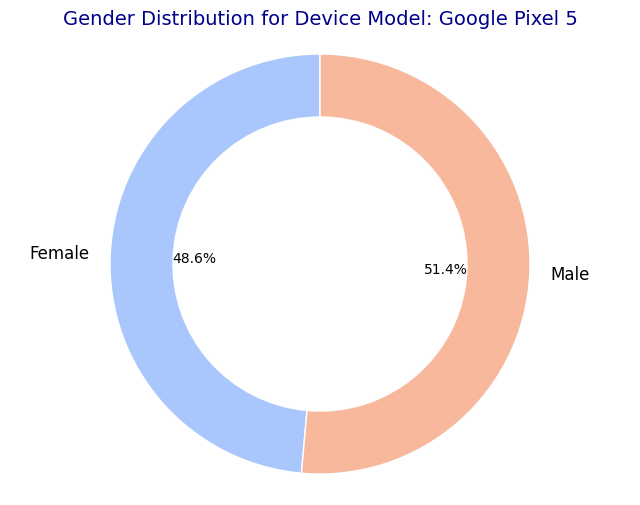

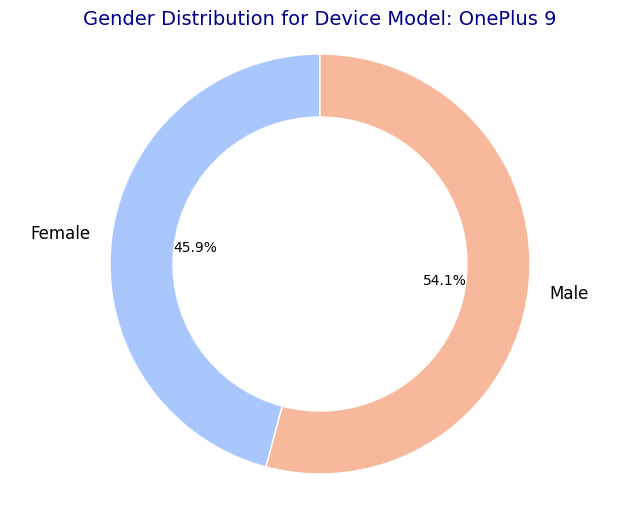

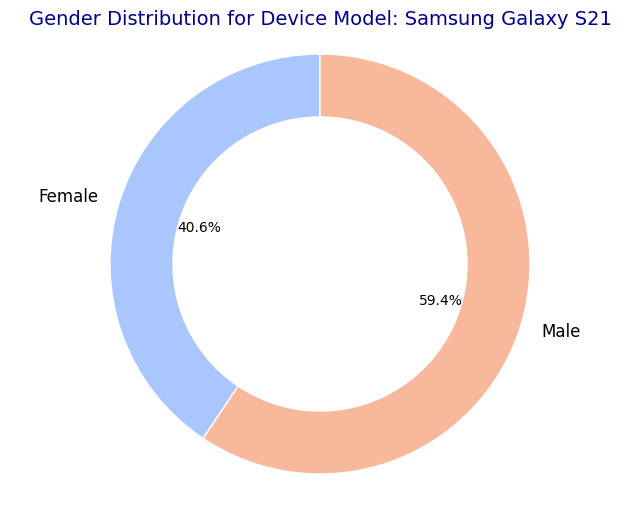

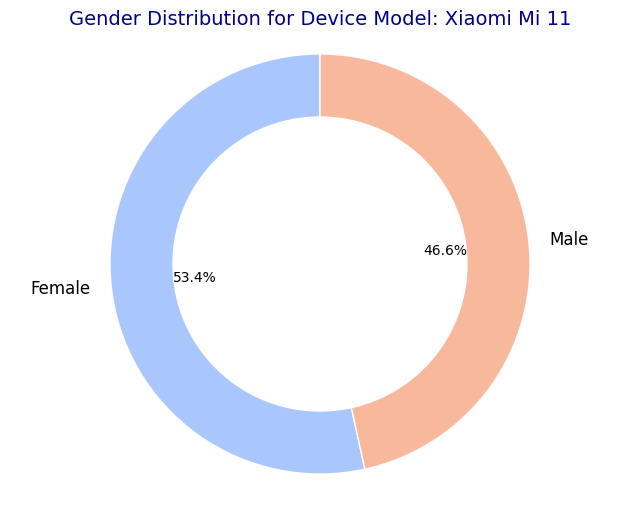

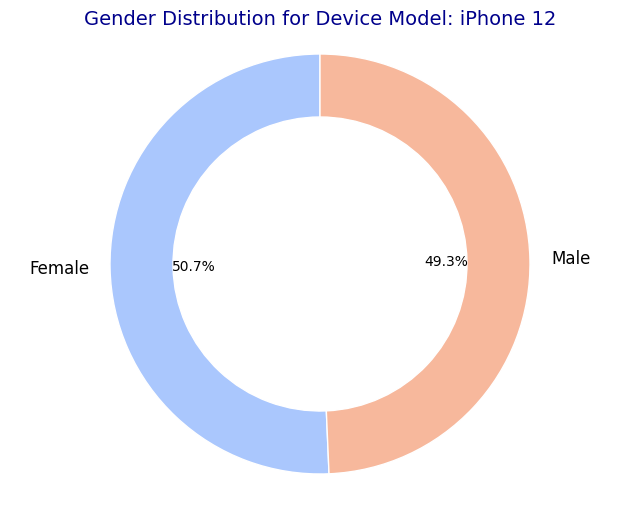

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by device model and gender, and count the number of users
device_gender_counts = df.groupby(['Device Model', 'Gender'])['User ID'].count().unstack()

# Fill NaN values with 0 (if a device model doesn't have a certain gender)
device_gender_counts = device_gender_counts.fillna(0)

# Define a color palette
colors = sns.color_palette("coolwarm", len(device_gender_counts.columns))

# Plot the donut chart for each device model
for device_model in device_gender_counts.index:
    gender_counts = device_gender_counts.loc[device_model]

    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.3, edgecolor='w')  # For donut chart
    )

    # Customize text styles
    plt.setp(autotexts, size=10, color="black")
    plt.setp(texts, size=12)

    # Add a circle in the center for the donut effect
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(center_circle)

    # Add title with custom formatting
    plt.title(
        f"Gender Distribution for Device Model: {device_model}",
        fontsize=14, color="darkblue"
    )

    # Equal aspect ratio ensures the pie is drawn as a circle
    plt.axis('equal')
    plt.show()

<ipython-input-28-925966d1bbed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='User Behavior Class', palette='viridis')


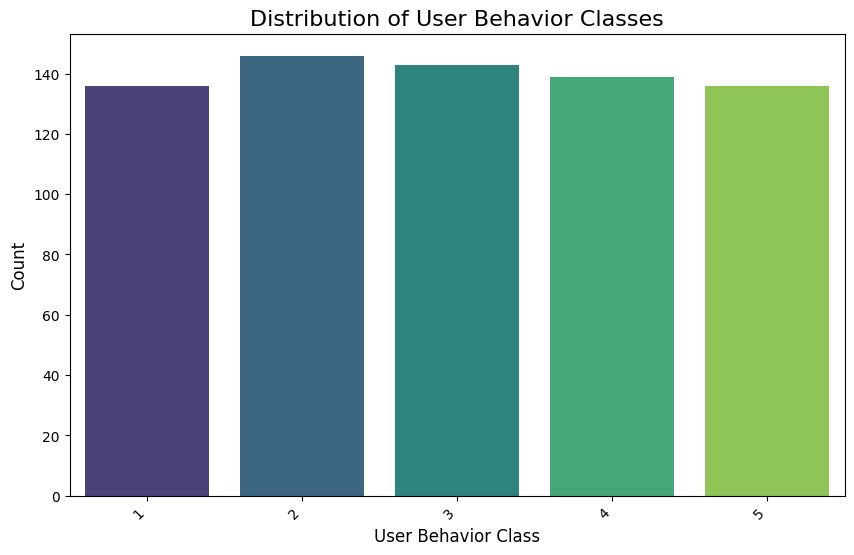

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='User Behavior Class', palette='viridis')
plt.title('Distribution of User Behavior Classes', fontsize=16)
plt.xlabel('User Behavior Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [29]:
!pip install -q tensorflow
import tensorflow as tf

In [30]:
X=df.drop(['User Behavior Class'],axis=1)
y=df['User Behavior Class']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=0)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 528 to 684
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     140 non-null    int64  
 1   Device Model                140 non-null    object 
 2   Operating System            140 non-null    object 
 3   App Usage Time (min/day)    140 non-null    int64  
 4   Screen On Time (hours/day)  140 non-null    float64
 5   Battery Drain (mAh/day)     140 non-null    int64  
 6   Number of Apps Installed    140 non-null    int64  
 7   Data Usage (MB/day)         140 non-null    int64  
 8   Age                         140 non-null    int64  
 9   Gender                      140 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 12.0+ KB


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 306 to 152
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     560 non-null    int64  
 1   Device Model                560 non-null    object 
 2   Operating System            560 non-null    object 
 3   App Usage Time (min/day)    560 non-null    int64  
 4   Screen On Time (hours/day)  560 non-null    float64
 5   Battery Drain (mAh/day)     560 non-null    int64  
 6   Number of Apps Installed    560 non-null    int64  
 7   Data Usage (MB/day)         560 non-null    int64  
 8   Age                         560 non-null    int64  
 9   Gender                      560 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 48.1+ KB


In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_train = pd.get_dummies(X_train)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts strings to integers
one_hot_encoder = OneHotEncoder(sparse_output=False) # Changed 'sparse' to 'sparse_output'
y_train_onehot = one_hot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [35]:
classifier=Sequential()

In [36]:
df.columns.value_counts().sum()

11

In [37]:
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))  # Input layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))  # Hidden layer
classifier.add(Dense(units=y_train_onehot.shape[1], kernel_initializer='uniform', activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model_history=classifier.fit(X_train,y_train_onehot,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1712 - loss: 1.6358 - val_accuracy: 0.2766 - val_loss: 1.6094
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2235 - loss: 1.6059 - val_accuracy: 0.1915 - val_loss: 1.6038
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2035 - loss: 1.5930 - val_accuracy: 0.1915 - val_loss: 1.5922
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2470 - loss: 1.5689 - val_accuracy: 0.2128 - val_loss: 1.5696
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2653 - loss: 1.5445 - val_accuracy: 0.1702 - val_loss: 1.5393
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1495 - loss: 1.4986 - val_accuracy: 0.1702 - val_loss: 1.5227
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2259 - loss: 1.4602 - val_accuracy: 0.1702 - val_loss: 1.5181
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2637 - loss: 1.4124 - val_accuracy: 0.1702 - 

In [40]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [41]:
accuracy=model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

In [42]:
for epoch in range(len(accuracy)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Accuracy: {accuracy[epoch]:.4f}")
    print(f"  Validation Accuracy: {val_accuracy[epoch]:.4f}")
    print(f"  Training Loss: {loss[epoch]:.4f}")
    print(f"  Validation Loss: {val_loss[epoch]:.4f}\n")


Epoch 1:
  Training Accuracy: 0.1613
  Validation Accuracy: 0.2766
  Training Loss: 1.6254
  Validation Loss: 1.6094

Epoch 2:
  Training Accuracy: 0.2043
  Validation Accuracy: 0.1915
  Training Loss: 1.6044
  Validation Loss: 1.6038

Epoch 3:
  Training Accuracy: 0.1935
  Validation Accuracy: 0.1915
  Training Loss: 1.5929
  Validation Loss: 1.5922

Epoch 4:
  Training Accuracy: 0.2258
  Validation Accuracy: 0.2128
  Training Loss: 1.5683
  Validation Loss: 1.5696

Epoch 5:
  Training Accuracy: 0.3118
  Validation Accuracy: 0.1702
  Training Loss: 1.5222
  Validation Loss: 1.5393

Epoch 6:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1702
  Training Loss: 1.4606
  Validation Loss: 1.5227

Epoch 7:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1702
  Training Loss: 1.4362
  Validation Loss: 1.5181

Epoch 8:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1702
  Training Loss: 1.4234
  Validation Loss: 1.4991

Epoch 9:
  Training Accuracy: 0.2366
  Validation Accura

In [43]:
import pandas as pd

# Membuat DataFrame untuk hasil pelatihan dan validasi
history_df = pd.DataFrame({
    'Epoch': range(1, len(accuracy) + 1),
    'Training Accuracy': accuracy,
    'Validation Accuracy': val_accuracy,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# Menampilkan tabel
print(history_df)


    Epoch  Training Accuracy  Validation Accuracy  Training Loss  \
0       1           0.161290             0.276596       1.625414   
1       2           0.204301             0.191489       1.604404   
2       3           0.193548             0.191489       1.592916   
3       4           0.225806             0.212766       1.568295   
4       5           0.311828             0.170213       1.522184   
..    ...                ...                  ...            ...   
95     96           0.795699             0.659574       0.588448   
96     97           0.741935             0.638298       0.580828   
97     98           0.731183             0.659574       0.579669   
98     99           0.763441             0.617021       0.559599   
99    100           0.784946             0.723404       0.544543   

    Validation Loss  
0          1.609442  
1          1.603822  
2          1.592228  
3          1.569598  
4          1.539343  
..              ...  
95         0.643600  
96     

In [44]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │             102 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 539 (2.11 KB)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 360 (1.41 KB)

In [45]:
classifier.get_weights()

[array([[-0.04533648,  0.01365306, -0.00120763,  0.00523468,  0.05037023,
         -0.0358031 ],
        [ 0.18786599,  0.05206127, -0.04517329, -0.04605378,  0.00967877,
          0.02064179],
        [ 0.0961287 ,  0.14567375, -0.03384965, -0.03477292,  0.04811409,
          0.00838038],
        [ 0.03121443, -0.0171456 , -0.01983268, -0.01914179,  0.10197353,
         -0.0235117 ],
        [-0.03752403, -0.02583122, -0.0094514 , -0.01852449,  0.1008244 ,
          0.03289611],
        [ 0.10539062,  0.09039506,  0.0120762 ,  0.02294539,  0.09690361,
         -0.03822354],
        [-0.5719943 , -0.42195112, -0.046226  , -0.02347366,  0.31691578,
          0.01871241],
        [-0.5951814 , -0.34320727, -0.03647385, -0.04732558,  0.05051668,
          0.03115268],
        [-0.4257726 , -0.21059257, -0.04999666,  0.04262917,  0.4225055 ,
          0.03061498],
        [-0.7034523 , -0.43932876, -0.04167223,  0.04747221,  0.45755532,
          0.00902168],
        [-0.22852905, -0.36744

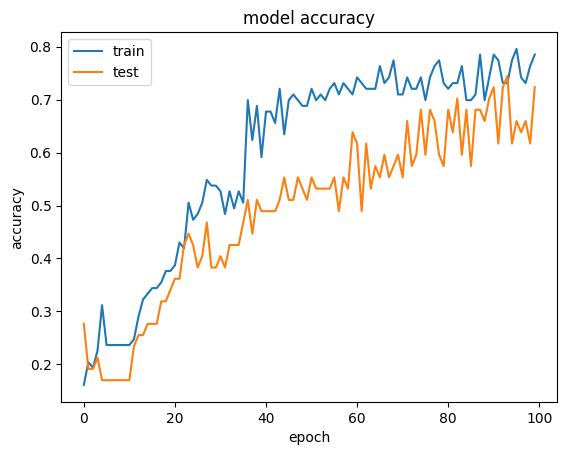

In [46]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

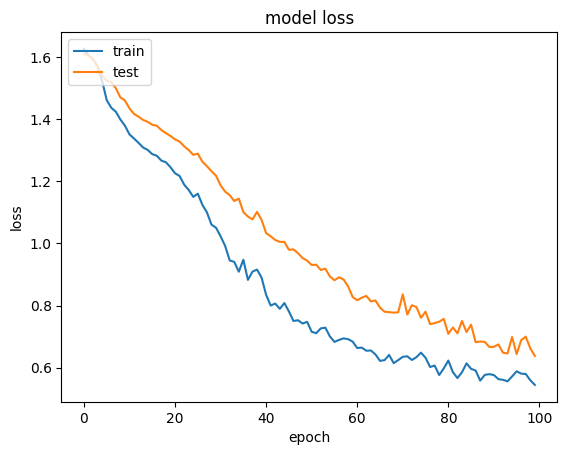

In [47]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
# Predicting the Test set results
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [49]:
 # Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[ 0,  0,  0,  0,  0,  0],
       [99, 11,  0,  0,  0,  0],
       [14, 93,  4,  0,  0,  0],
       [ 0, 65, 30, 20,  6,  0],
       [ 0,  1, 16, 67, 28,  0],
       [ 0,  0,  0, 13, 93,  0]])

akurasi total

In [50]:
# Pastikan Anda sudah mengimpor LabelEncoder dan OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Encode label y_test menggunakan LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Mengubah label menjadi angka

# Lakukan one-hot encoding pada y_test yang sudah di-encode
# Ganti 'sparse' dengan 'sparse_output'
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Mengubah menjadi format one-hot encoding
y_test_onehot = one_hot_encoder.fit_transform(y_test_encoded.reshape(-1, 1))

# Sekarang, Anda dapat melakukan evaluasi pada data uji
test_loss, test_accuracy = classifier.evaluate(X_test, y_test_onehot, batch_size=10)

# Menampilkan hasil akurasi dan loss pada data uji
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.7405
Test Loss: 0.6898
Test Accuracy: 68.21%


In [51]:
# Prediksi kelas pada data uji
y_pred = classifier.predict(X_test)

# Mengambil kelas yang diprediksi (kelas dengan probabilitas tertinggi)
y_pred_classes = y_pred.argmax(axis=1)

# Menghitung akurasi secara manual
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_classes)

# Menampilkan hasil akurasi
print(f"Test Accuracy: {accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Accuracy: 11.25%


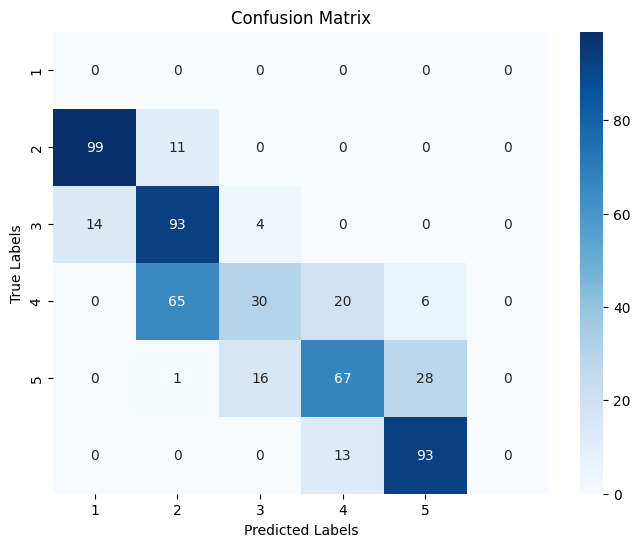

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Streamlit

In [53]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Judul dashboard
st.title("User Behavior Analysis Dashboard")
st.write("Dashboard untuk menganalisis perilaku pengguna menggunakan dataset.")

# Muat dataset
@st.cache  # Cache untuk mempercepat loading data
def load_data():
    df = pd.read_csv("user_behavior_dataset.csv")
    return df

df = load_data()

# Menampilkan 5 baris pertama dataset
if st.checkbox('Tampilkan 5 baris pertama dari dataset'):
    st.write(df.head())

# Pilihan menu untuk tampilan visualisasi
menu = ["Data Overview", "Korelasi Data", "Visualisasi Lainnya"]
pilihan_menu = st.sidebar.selectbox("Pilih Menu", menu)

if pilihan_menu == "Data Overview":
    st.subheader("Data Overview")
    st.write("Berikut adalah ringkasan statistik dari dataset:")
    st.write(df.describe())

elif pilihan_menu == "Korelasi Data":
    st.subheader("Matriks Korelasi")
    # Ambil hanya kolom numerik
    numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(['User ID', 'User Behavior Class', 'Age'], axis=1)

    # Buat matriks korelasi
    correlation_matrix = numerical_df.corr()

    # Visualisasi menggunakan heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    st.pyplot(fig)

elif pilihan_menu == "Visualisasi Lainnya":
    st.subheader("Visualisasi Distribusi Kolom")

    # Pilih kolom untuk divisualisasikan
    cols_to_plot = ['Battery Drain (mAh/day)', 'Screen On Time (hours/day)', 'App Usage Time (min/day)', 'Data Usage (MB/day)']

    for col in cols_to_plot:
        st.write(f"Visualisasi untuk {col}")
        plt.figure(figsize=(8, 6))
        sns.violinplot(y=df[col], color='lightcoral')
        plt.title(f'{col} Distribusi')
        st.pyplot(plt)
        plt.clf()  # Clear figure untuk plot berikutnya


2024-12-04 16:52:04.026 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 16:52:04.298 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-04 16:52:04.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 16:52:04.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 16:52:04.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 16:52:04.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 16:52:04.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 16:52:04.316 Thread 'MainThread': mi

In [55]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
